## Imports


In [1]:
import numpy
import cv2

from modules.zoomTestBench import Zoom

## Functions


In [2]:
from IPython.display import Image, display, clear_output


def show_frame(frame: numpy.ndarray, clear: bool = True):
    """Displays and image to the output.

    Args:
        frame (numpy.ndarray): The image to show.
        clear (bool): Wether to clear the output before showing the image.
    """

    frame_width = frame.shape[1]
    frame_height = frame.shape[0]

    cv2.putText(
        frame,
        f"({frame_width} x {frame_height})",
        (15, 30),
        cv2.FONT_HERSHEY_TRIPLEX,
        1,
        (0, 0, 255),
        2,
    )

    params = [cv2.IMWRITE_JPEG_QUALITY, 50]

    jpg = cv2.imencode(".jpg", frame, params)[1].tobytes()

    if clear:
        clear_output(wait=True)

    display(Image(data=jpg))

## Code

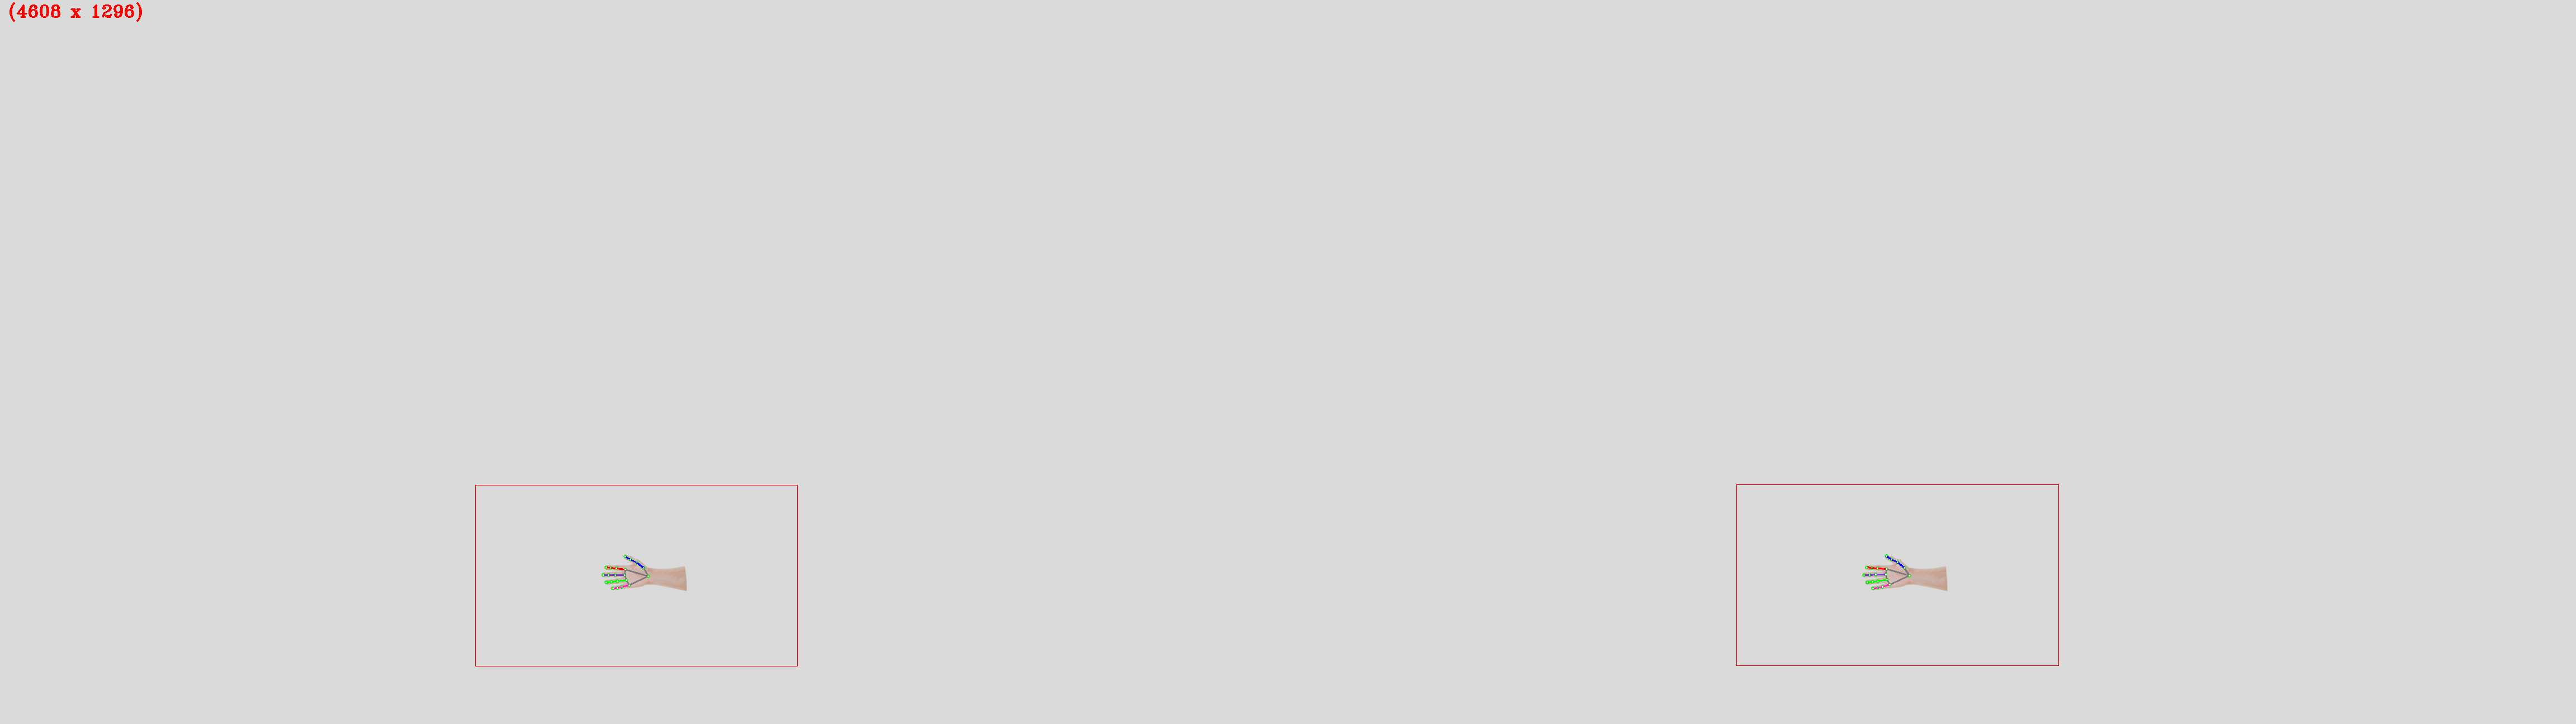

[[ 1.47760281e-02  2.10216468e+00  1.80599770e-01]
 [-1.66104250e-03  2.09030164e+00  2.06994777e-01]
 [-2.52714117e-02  2.07659018e+00  2.25087829e-01]
 [-4.77606679e-02  2.06643642e+00  2.35303557e-01]
 [-6.60870946e-02  2.07421335e+00  2.45290185e-01]
 [-6.64308749e-02  2.09667088e+00  2.03082607e-01]
 [-9.76341253e-02  2.08248475e+00  2.06807166e-01]
 [-1.17193880e-01  2.07826052e+00  2.08007513e-01]
 [-1.34636278e-01  2.07707124e+00  2.08698132e-01]
 [-6.87167408e-02  2.10448754e+00  1.84479089e-01]
 [-1.02906885e-01  2.08774052e+00  1.84465811e-01]
 [-1.24500151e-01  2.07917802e+00  1.84172840e-01]
 [-1.42969278e-01  2.07551526e+00  1.83615742e-01]
 [-6.35435563e-02  2.10511189e+00  1.67315772e-01]
 [-9.45146838e-02  2.09131317e+00  1.63008770e-01]
 [-1.14895749e-01  2.08730698e+00  1.61168312e-01]
 [-1.32627348e-01  2.08856029e+00  1.60093871e-01]
 [-5.27640089e-02  2.10226472e+00  1.50687212e-01]
 [-7.72276741e-02  2.08658707e+00  1.44715222e-01]
 [-9.36341808e-02  2.07922182e+

KeyboardInterrupt: 

In [3]:
from modules.dataSetControlCentreHeight import DataSetControlCentreHeight
from modules.localiser import Localiser

localiser = Localiser()


dscch = DataSetControlCentreHeight()


CONTINUOUS = True
ZOOM_STATE = "zoom"

USE_SIMPLE = ZOOM_STATE in ("low_res", "full_res")
USE_FULL = ZOOM_STATE in ("full_res")


angles = dscch.get_angles()
dists = dscch.get_distances()

for angle in angles:

    print(f"Running Trial for Angle:{angle}")

    # Reset the finders
    left_hand_finder = Zoom(continuous=CONTINUOUS)
    right_hand_finder = Zoom(continuous=CONTINUOUS)

    if CONTINUOUS:
        for i in range(3):
            left_frame, right_frame = dscch.get_frames(dists[0], angle)

            left_hand = left_hand_finder.get_hand(
                left_frame, simple=USE_SIMPLE, use_full=USE_FULL
            )
            right_hand = right_hand_finder.get_hand(
                right_frame, simple=USE_SIMPLE, use_full=USE_FULL
            )

            left_frame = left_hand_finder.draw_zoom_outline(left_frame)
            right_frame = right_hand_finder.draw_zoom_outline(right_frame)

            left_frame = left_hand.draw(left_frame)
            right_frame = right_hand.draw(right_frame)

            both_new = numpy.hstack((left_frame, right_frame))

            show_frame(both_new, clear=True)

    for dist in dists:

        left_frame, right_frame = dscch.get_frames(dist, angle)

        left_hand = left_hand_finder.get_hand(
            left_frame, simple=USE_SIMPLE, use_full=USE_FULL
        )
        right_hand = right_hand_finder.get_hand(
            right_frame, simple=USE_SIMPLE, use_full=USE_FULL
        )

        predicted_points = localiser.get_coords(left_hand, right_hand)

        dscch.save_predicted(
            dist,
            angle,
            predicted_points,
            continuous=CONTINUOUS,
            zoom_state=ZOOM_STATE,
        )

        left_frame = left_hand_finder.draw_zoom_outline(left_frame)
        right_frame = right_hand_finder.draw_zoom_outline(right_frame)

        left_frame = left_hand.draw(left_frame)
        right_frame = right_hand.draw(right_frame)

        both_new = numpy.hstack((left_frame, right_frame))

        show_frame(both_new, clear=True)

        print(predicted_points)